In [107]:
import os
import tarfile
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from dpipe.io import load, save
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from torch.utils.data import random_split
from torchvision import transforms
from torchvision.datasets import ImageFolder
from torchvision.datasets.utils import download_url
from torchvision.transforms import ToTensor
from tqdm import tqdm
from transformers import AutoImageProcessor, AutoModel

from alssl.data.cifar10 import DATA_PATH, get_dataset
from alssl.model.dino import LightningDino

In [116]:
ds = get_dataset()

In [104]:
val_ids = load("/shared/experiments/active_learning/alssl/exp9/val_ids_ids.json")
train_ids = load("/shared/experiments/active_learning/alssl/exp9/train_ids.json")

In [11]:
dino_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Resize((228, 228), antialias=True),
        transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    ]
)

In [131]:
COLORS = [
    "Red",
    "Green",
    "Blue",
    "Yellow",
    "Cyan",
    "Magenta",
    "Orange",
    "Purple",
    "Indigo",
    "Pink",
]

CLASSES = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [123]:
# embeddings = []

# for i in range(1000):
#     emb = load(f"/shared/projects/active_learning/embeddings/cifar10/dinov2/train/new1k/embeddings_train_{i // 100}_{i}.npy")
#     embeddings.append(emb)

In [132]:
ROOT = Path("/shared/projects/active_learning/embeddings/cifar10/dinov2/train/")

all_new_emdebbings = load(ROOT / "all_1k_embeddings.npy")
all_embeddings = load(ROOT / "all_embeddings.npy")
all_labels = load(ROOT / "all_labels.npy")

colors = [COLORS[i] for i in all_labels]

In [140]:
pca = make_pipeline(PCA(n_components=2))
pca.fit(all_embeddings)
pca_embedded_2d = pca.transform(all_embeddings)

pca = make_pipeline(PCA(n_components=2))
pca.fit(all_new_emdebbings)
pca_new_embedded_2d = pca.transform(all_new_emdebbings)

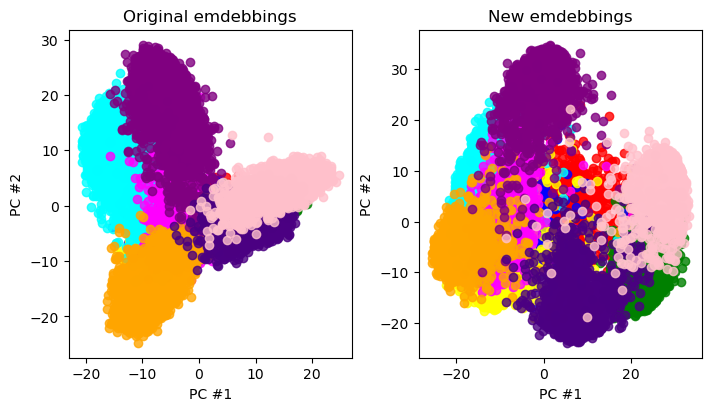

In [141]:
import matplotlib.pyplot as plt
import numpy as np


fig, (axes1, axes2) = plt.subplots(1, 2, figsize=(7, 4), layout="constrained")

for i in range(10):
    x, y = np.moveaxis(pca_embedded_2d[5000 * i : 5000 * (i + 1)], -1, 0)
    axes1.scatter(x, y, color=COLORS[i], alpha=0.8, label=CLASSES[i])


for i in range(10):
    x, y = np.moveaxis(pca_new_embedded_2d[5000 * i : 5000 * (i + 1)], -1, 0)
    axes2.scatter(x, y, color=COLORS[i], alpha=0.8, label=CLASSES[i])

axes1.set_title("Original emdebbings")
axes2.set_title("New emdebbings")

axes1.set_xlabel("PC #1")
axes1.set_ylabel("PC #2")

axes2.set_xlabel("PC #1")
axes2.set_ylabel("PC #2")

# plt.legend(loc="upper left")
# plt.grid()
plt.show()

explained_variance_ratio:  0.0789572186768055


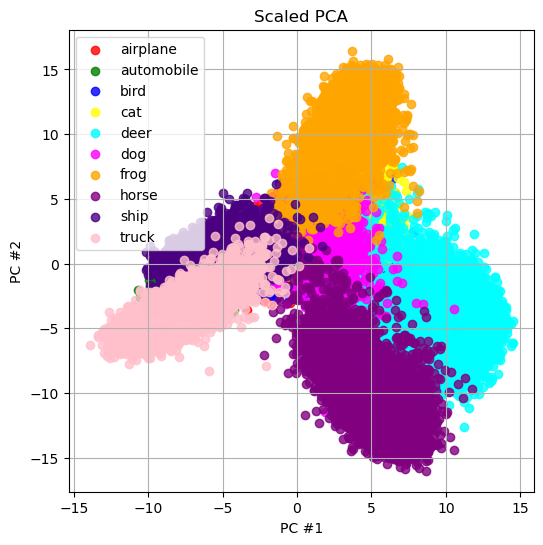

In [133]:
pca = make_pipeline(StandardScaler(), PCA(n_components=2))
pca.fit(all_embeddings)
pca_embedded_2d = pca.transform(all_embeddings)

print("explained_variance_ratio: ", sum((pca[1].explained_variance_ratio_)))

plt.figure(figsize=(6, 6))

for i in range(10):
    x, y = np.moveaxis(pca_embedded_2d[5000 * i : 5000 * (i + 1)], -1, 0)
    plt.scatter(x, y, color=COLORS[i], alpha=0.8, label=CLASSES[i])

plt.title("Scaled PCA")
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.legend(loc="upper left")
plt.grid()
plt.show()

explained_variance_ratio:  0.08585821837186813


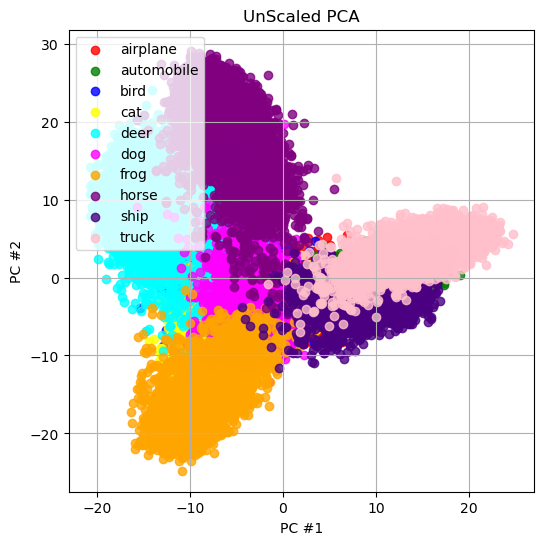

In [26]:
pca = PCA(n_components=2)
pca.fit(all_embeddings)
pca_embedded_2d = pca.transform(all_embeddings)

print("explained_variance_ratio: ", sum((pca.explained_variance_ratio_)))

plt.figure(figsize=(6, 6))

for i in range(10):
    x, y = np.moveaxis(pca_embedded_2d[5000 * i : 5000 * (i + 1)], -1, 0)
    plt.scatter(x, y, color=COLORS[i], alpha=0.8, label=CLASSES[i])


plt.title("UnScaled PCA")
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.legend(loc="upper left")
plt.grid()
plt.show()